---
<center><h1> Lesson 4 - Intro to machine learning with scikit-learn</h1></center>
<center><h1>Part 2.Machine learning general overview. Classification</h1></center>

---

<h2>Classification with Iris dataset</h2>

The Iris dataset is a very simple flower database introduced by Ronald Fisher in 1936. It has 150 observations of the iris flower specifying some measurements: sepal length, sepal width, petal length and petal width together with its subtype: Iris setosa, Iris versicolor, Iris virginica. Four features were measured from each sample: the length and the width of the sepals and petals, in centimetres.

<img src="images/640px-Irissetosa1.jpg">

Let's display images for each type of iris.

In [1]:
from IPython.core.display import Image, display

display(Image(url='images/01_Iris_setosa.jpg', width=640))
print "Iris Setosa\n"

display(Image(url='images/02_Iris_versicolor.jpg', width=400))
print "Iris Versicolor\n"

display(Image(url='images/03_Iris_virginica.jpg', width=400))
print "Iris Virginica"

Iris Setosa



Iris Versicolor



Iris Virginica


In [2]:
from sklearn.datasets import *
# Load Iris dataset
data_iris = load_iris()

print data_iris.keys()

['target_names', 'data', 'target', 'DESCR', 'feature_names']


In [3]:
# Information about the content of Iris dataset is also available
print data_iris.DESCR

Iris Plants Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20  0.76     0.9565  (high!)
    ============== ==== ==== ======= ===== ====================

    :Missing Attribute Values: None
  

In [4]:
# Let's look at features and Iris (target) names
print "feature_names"
print data_iris.feature_names

print "\ntarget_names"
print data_iris.target_names

feature_names
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']

target_names
['setosa' 'versicolor' 'virginica']


In [5]:
# Let's look at the data in iris dataset
data_iris.data[:10]

array([[ 5.1,  3.5,  1.4,  0.2],
       [ 4.9,  3. ,  1.4,  0.2],
       [ 4.7,  3.2,  1.3,  0.2],
       [ 4.6,  3.1,  1.5,  0.2],
       [ 5. ,  3.6,  1.4,  0.2],
       [ 5.4,  3.9,  1.7,  0.4],
       [ 4.6,  3.4,  1.4,  0.3],
       [ 5. ,  3.4,  1.5,  0.2],
       [ 4.4,  2.9,  1.4,  0.2],
       [ 4.9,  3.1,  1.5,  0.1]])

In [6]:
# Let's see target values
data_iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In Boston datase target values were distributed continuously. But in the Iris dataset we have only three different target values (discrete values 0, 1, 2).  
The target value 0 corresponds to Iris Setosa, the number 1 matches with Iris Versicolor and the last number 2 corresponds to Iris Virginica.  

In [7]:
import pandas as pd

# Create a pandas DataFrame for iris dataset
iris = pd.DataFrame(data=data_iris.data, columns=data_iris.feature_names)
iris["target"] = data_iris.target
print "Iris dataset contains {} rows.".format(iris.index.size)
iris.head()

Iris dataset contains 150 rows.


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


Build the scatter plot for width and length.

/usr/lib/python2.7/dist-packages/matplotlib/collections.py:571: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


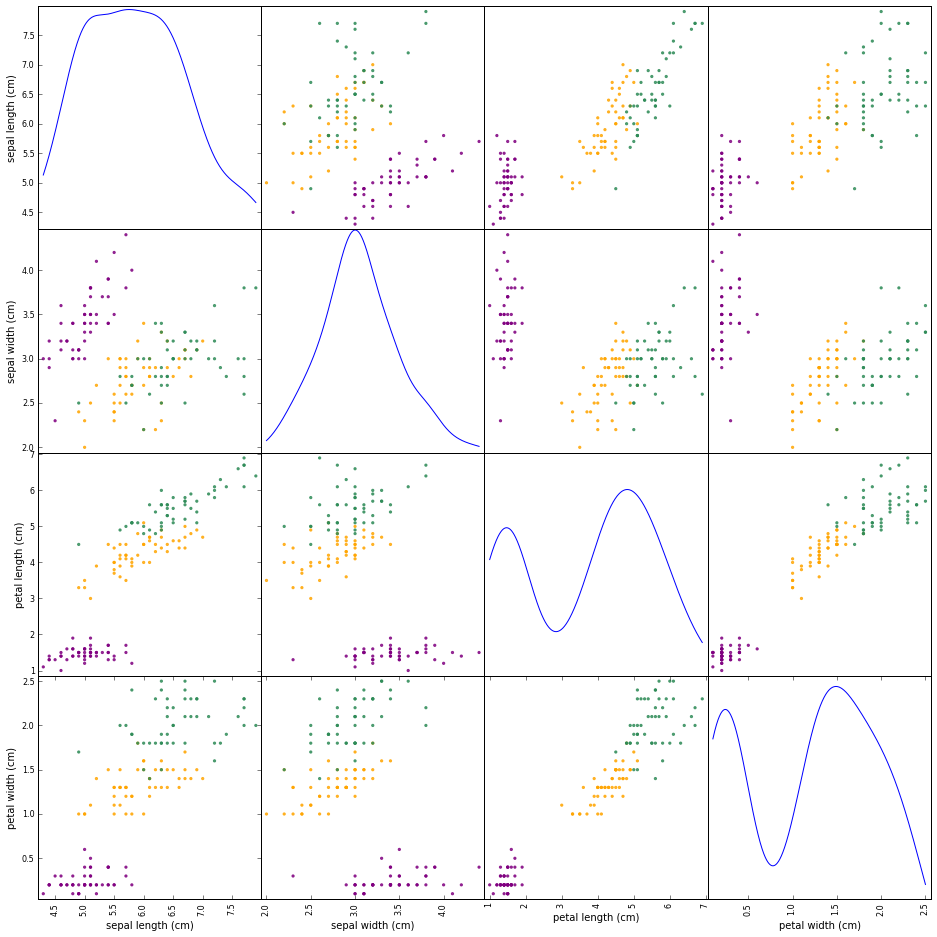

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt
from pandas.tools.plotting import scatter_matrix

# set color for each iris kind
color_dict = {0: "purple",   # Iris Setosa
              1: "orange",    # Iris Versicolor
              2: "seagreen"}  # Iris Virginica

colors = iris["target"].map(lambda x: color_dict.get(x))
X = iris.drop('target', axis=1)
Y = iris['target']

ax = scatter_matrix(X, color=colors, alpha=0.8, figsize=(16, 16), diagonal='kde')
# KDE (kernel density estimation) is a non-parametric way to estimate the probability density function of a variable
# more info here http://scikit-learn.org/stable/modules/density.html
# and here https://en.wikipedia.org/wiki/Kernel_density_estimation

On the set of scatter plot we can see some plots where groups of various kinds of iris can be easily separated with the naked eye, e.g. for pairs (petal length, petal width) or (sepal length, petal lenght). But there some plots with too shuffled points like (sepal width, sepal length), which need more specific approach to separate points to groups.

### <span style="color: blue">Support vector machines</span>

Iris class prediction is a classification problem. 

One of the simplest and common used ML model applied to classification problems is Support Vector Machines (SVM). We chose it for Iris dataset.

SVM is a discriminative classifier formally defined by a separating hyperplane. In other words, given labeled training data (supervised learning), the algorithm outputs an optimal hyperplane which categorizes new examples. Thus, SVM model is a representation of the examples as points in space, mapped so that the examples of the separate categories are divided by a clear gap that is as wide as possible. New examples are then mapped into that same space and predicted to belong to a category based on which side of the gap they fall on.

Suppose, we have a linearly separable set of 2D-points which belong to one of two classes (dataset features). In general, we can find the infinite set of separating straight lines. But which of them separates correctly (or with minimal error) these two groups of points? Is any of them better than the others?

<img src="images/svm1.png">

In this example we deal with lines and points in the Cartesian plane instead of hyperplanes and vectors in a high dimensional space. This is a simplification of the problem. It is important to understand that this is done only because our intuition is better built from examples that are easy to imagine. However, the same concepts apply to tasks where the examples to classify lie in a space whose dimension is higher than two.

We can intuitively define a criterion to estimate the worth of the lines:

> A line is bad if it passes too close to the points because it will be noise sensitive and it will not generalize correctly. Therefore, our goal should be to find the line passing as far as possible from all points.

Then, the operation of the SVM algorithm is based on finding the hyperplane that gives the largest minimum distance to the training examples. Twice, this distance receives the important name of _margin_ within SVM’s theory. Therefore, the optimal separating hyperplane maximizes the margin of the training data.
 
<img src="images/svm2.png">

scikit-learn contains a few various SVM models. We will consider one of them ([C-Support Vector Classification](http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC) - `SVC` with linear kernel. More details about SVM you can read at [Wikipedia](https://en.wikipedia.org/wiki/Support_vector_machine) and [here](http://scikit-learn.org/stable/modules/svm.html). 

In [9]:
from sklearn import svm

# Create SVC model
svc = svm.SVC(probability=True)
# show SVC parameters
svc

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [10]:
# Create LinearSVC model
lin_svc = svm.LinearSVC()
lin_svc

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

Let's fit model in features and target

In [11]:
svc.fit(X, Y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [12]:
lin_svc.fit(X, Y)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

When the model is trained, it can be used to predict target values.  
Let's see the length and width of the petals & sepals for each iris kind.  
And after that write a few new array of these parameters to test chosen classifiers. 

In [13]:
print "Iris Setosa"
print X[:5]

print "Iris Versicolor"
print X[50:55]

print "Iris Virginica"
print X[100:105]

Iris Setosa
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2
Iris Versicolor
    sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
50                7.0               3.2                4.7               1.4
51                6.4               3.2                4.5               1.5
52                6.9               3.1                4.9               1.5
53                5.5               2.3                4.0               1.3
54                6.5               2.8                4.6               1.5
Iris Virginica
     sepal length (cm)  sepal width (cm

sepal length (cm)


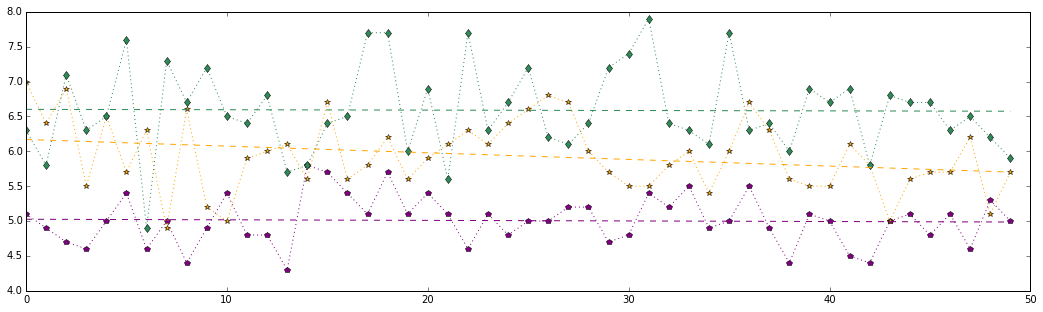

sepal width (cm)


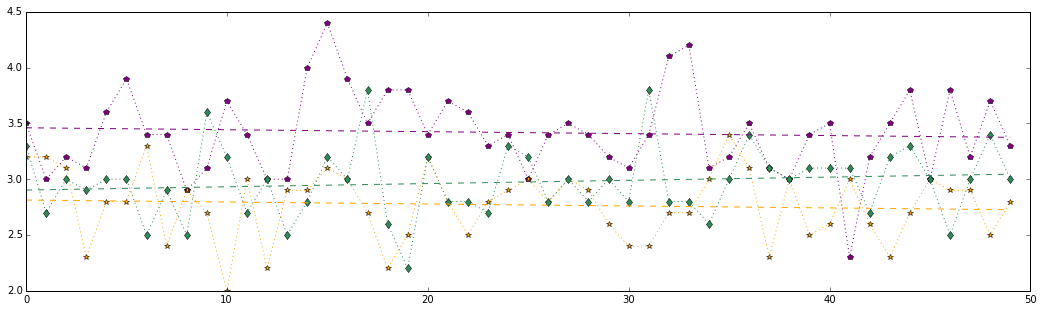

petal length (cm)


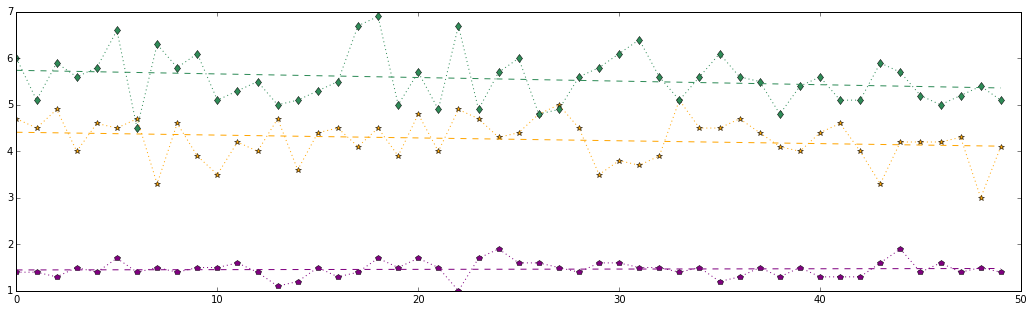

petal width (cm)


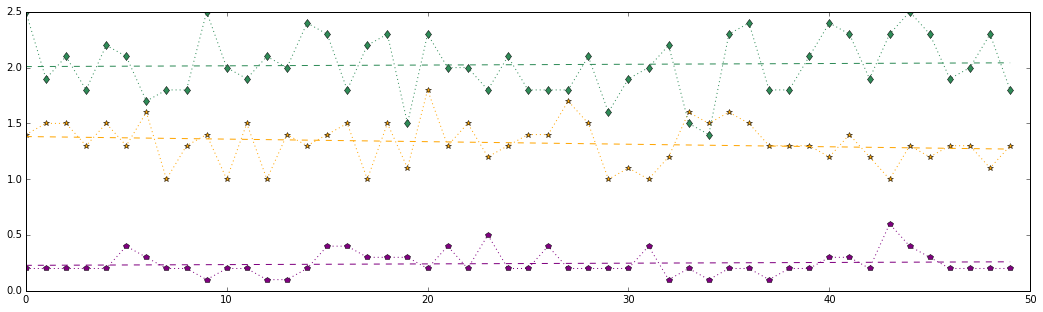

In [14]:
import numpy as np
# Draw 4 plots for each feature of all iris kinds
plt.rcParams["figure.figsize"] = (18.0, 5.0)

def draw(col_num):
    print X.columns[col_num]
    x = np.arange(50)
    y1 = X.loc[:49, X.columns[col_num]].values       # Setosa
    y2 = X.loc[50:99, X.columns[col_num]].values     # Versicolor
    y3 = X.loc[100:149, X.columns[col_num]].values   # Virginica

    plt.plot(x, y1, color = 'purple', ls = 'dotted', marker = 'p')
    plt.plot(x, y2, color = 'orange', ls = 'dotted', marker = '*')
    plt.plot(x, y3, color = 'seagreen', ls = 'dotted', marker = 'd')

    # Linear trendlines
    p1 = np.poly1d(np.polyfit(x, y1, 1))
    p2 = np.poly1d(np.polyfit(x, y2, 1))
    p3 = np.poly1d(np.polyfit(x, y3, 1))

    plt.plot(x, p1(x), color = 'purple', ls = '--')
    plt.plot(x, p2(x), color = 'orange', ls = '--')
    plt.plot(x, p3(x), color = 'seagreen', ls = '--')

    plt.show()
    
for i in range(4):
    draw(i)

In [15]:
# Based on above visualizations let's create an array with features values close to each iris kind 
# and with one value with is far from each class 
X_new = [
    [5.0,  3.6,  1.3,  0.25],   # very similar to Setosa
    [7.0,  3.0,  5.0,  1.5],    # very similar to Versicolor
    [6.5,  3.0,  6.2,  2.25],   # very similar to Virginica
    [3.0,  1.5,  2.5,  1.0]     # length and width parameters are far from each group
]

# The last element of `X_new` is most closest above purple (class 0) line on the first visualization from the above set,
# it is almost between orange (class 1) and purple line on the second visualization, 
# but it is most closest to the orange line on the third and fourth lines.
# Meaning, this features set should corresponds to class 1.
# Let's see which result the SVM classifier will give.

predicted = svc.predict(X_new)
# Let's look at how scikit-learn classified above four arrays. Do you remember that
# 0 corresponds to Setosa
# 1 is Versicolor
# 2 coincides with Virginica
print predicted

#SVM Classifier have builded function `score()`, which returns the mean accuracy on the given test data and labels.
svc.score(X, Y)

[0 1 2 0]


0.98666666666666669

In [16]:
predicted_2 = lin_svc.predict(X_new)
print predicted_2

lin_svc.score(X, Y)

[0 1 2 1]


0.96666666666666667

Let's compute probabilities of possible outcomes for samples in `X_new` with  a method `predict_proba()` of `SVC` model (`LinearSVC` doesn't support it).

Note, the model need to have probability information computed at training time: fit with attribute `probability` set to `True`, that we have made above.

In [17]:
pred_prob = svc.predict_proba(X_new)
pred_prob

array([[ 0.97215296,  0.01302162,  0.01482542],
       [ 0.01558169,  0.74747482,  0.23694349],
       [ 0.010413  ,  0.00215635,  0.98743065],
       [ 0.33116373,  0.3288059 ,  0.34003037]])

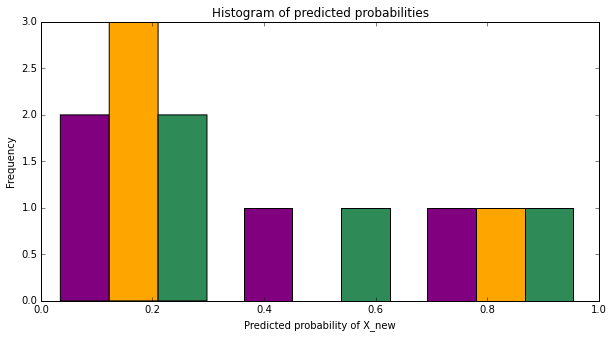

In [18]:
# Histogram of predicted probabilities
plt.rcParams["figure.figsize"] = (10.0, 5.0)

plt.hist(pred_prob, bins=3, color = ('purple', 'orange','seagreen'))
plt.xlim(0, 1)
plt.title('Histogram of predicted probabilities')
plt.xlabel('Predicted probability of X_new')
plt.ylabel('Frequency')
plt.show()

### _Confusion matrix_:

Let's build a [**confusion matrix**](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html) which is a specific table layout that allows visualization of the performance of an algorithm.  

Each column of the matrix represents the instances in a predicted class while each row represents the instances in an actual class (or vice-versa). The diagonal elements represent the number of points for which the predicted label is equal to the true label, while off-diagonal elements are those that are mislabeled by the classifier. The higher the diagonal values of the confusion matrix the better, indicating many correct predictions.

Confusion matrix
[[13  0  0]
 [ 0 15  1]
 [ 0  0  9]]


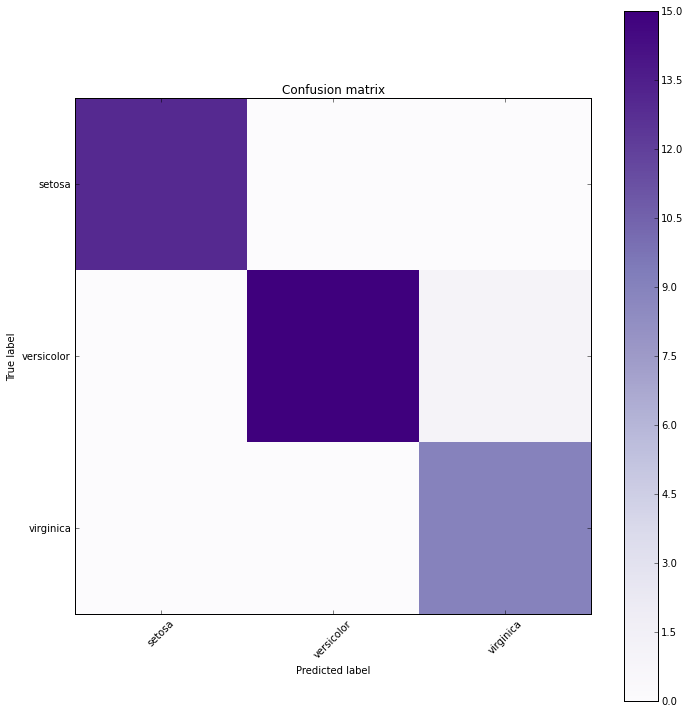

In [19]:
from sklearn.metrics import confusion_matrix
# Import function for splitting arrays or matrices into random train and test subsets
from sklearn.cross_validation import train_test_split

# Split the data into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=0)

y_pred = svc.fit(X_train, y_train).predict(X_test)
   
# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)
print('Confusion matrix')
print(cm)

plt.rcParams['figure.figsize'] = (10.0, 10.0)
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Purples)
plt.title('Confusion matrix')
plt.colorbar()
tick_marks = np.arange(len(data_iris.target_names))
plt.xticks(tick_marks, data_iris.target_names, rotation=45)
plt.yticks(tick_marks, data_iris.target_names)
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')

plt.show()

### _Precision_:

Precision is the ratio `tp / (tp + fp)` where `tp` is the number of true positives and `fp` the number of false positives. The precision is intuitively the ability of the classifier not to label as positive a sample that is negative.  
The best value is 1 and the worst value is 0. 

Function [`precision_score`](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_score.html#sklearn.metrics.precision_score) of sklearn.metrics module allows to compute the precision.

In [20]:
from sklearn.metrics import precision_score

precision_score(y_test, y_pred)

/usr/local/lib/python2.7/dist-packages/sklearn/metrics/classification.py:1203: DeprecationWarning: The default `weighted` averaging is deprecated, and from version 0.18, use of precision, recall or F-score with multiclass or multilabel data or pos_label=None will result in an exception. Please set an explicit value for `average`, one of (None, 'micro', 'macro', 'weighted', 'samples'). In cross validation use, for instance, scoring="f1_weighted" instead of scoring="f1".
  sample_weight=sample_weight)


0.97631578947368425

### _Recall_:


Recall is the ratio `tp / (tp + fn)` where `tp` is the number of true positives and `fn` the number of false negatives. The recall is intuitively the ability of the classifier to find all the positive samples.
The best value is 1 and the worst value is 0.

Function [`recall_score`](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.recall_score.html#sklearn.metrics.recall_score) of sklearn.metrics module allows to compute the recall.

In [21]:
from sklearn.metrics import recall_score

recall_score(y_test, y_pred)

/usr/local/lib/python2.7/dist-packages/sklearn/metrics/classification.py:1304: DeprecationWarning: The default `weighted` averaging is deprecated, and from version 0.18, use of precision, recall or F-score with multiclass or multilabel data or pos_label=None will result in an exception. Please set an explicit value for `average`, one of (None, 'micro', 'macro', 'weighted', 'samples'). In cross validation use, for instance, scoring="f1_weighted" instead of scoring="f1".
  sample_weight=sample_weight)


0.97368421052631582

### _Accuracy_:

In multilabel classification, this function computes subset accuracy: the set of labels predicted for a sample must exactly match the corresponding set of labels in `y_true`.  

Function [`accuracy_score`](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html#sklearn.metrics.accuracy_score) of sklearn.metrics module allows to know how often the classifier is correct.

In [22]:
from sklearn.metrics import accuracy_score

print accuracy_score(y_test, y_pred)

0.973684210526


### _ROC Curves and Area Under the Curve (AUC)_:

Wouldn't it be nice if we could see how sensitivity and specificity are affected by various thresholds, without actually changing the threshold? Sure, the ROC helps us with this. 

**ROC** (Receiver Operating Characteristic) curves typically feature true positive rate on the Y axis, and false positive rate on the X axis. This means that the top left corner of the plot is the “ideal” point - a false positive rate of zero, and a true positive rate of one. This is not very realistic, but it does mean that a larger area under the curve (AUC) is usually better.

ROC curves are typically used in binary classification to study the output of a classifier. In order to extend ROC curve and ROC area to multi-class or multi-label classification, it is necessary to binarize the output. One ROC curve can be drawn per label, but one can also draw a ROC curve by considering each element of the label indicator matrix as a binary prediction (micro-averaging).

ROC curve can help you to choose a threshold that balances sensitivity and specificity in a way that makes sense for your particular context. You can't actually see the thresholds used to generate the curve on the ROC curve itself.

More info you can find on [Wikipedia](https://en.wikipedia.org/wiki/Receiver_operating_characteristic) and [here](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html).

**AUC** is the percentage of the ROC plot that is underneath the curve. AUC is useful as a single number summary of classifier performance.

If you randomly chose one positive and one negative observation, AUC represents the likelihood that your classifier will assign a higher predicted probability to the positive observation.

AUC is useful even when there is high class imbalance (unlike classification accuracy).

In [23]:
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier

# We can also use directly loaded iris dataset, which contains numpy arrays
X = data_iris.data
Y = data_iris.target

# Binarize the targets
y_bin = label_binarize(Y, classes=[0, 1, 2])
print "Binarized targets:"
print y_bin[:3]
print "...\n", y_bin[50:53]
print "...\n", y_bin[100:103], "\n..."

n_classes = y_bin.shape[1]
print "Different classes of targets: ", n_classes

# shuffle and split training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y_bin, test_size=.5, random_state=0)

# Now we have three various labels. 
# OneVsRestClassifier consists in fitting one classifier per class. 
# For each classifier, the class is fitted against all the other classes.
# This is the most commonly used strategy for multiclass classification and is a fair default choice.
svc_roc = OneVsRestClassifier(svm.SVC(kernel='linear', probability=True))#, random_state=random_state))
# Learn to predict each class against the other
y_score = svc_roc.fit(X_train, y_train).decision_function(X_test)

Binarized targets:
[[1 0 0]
 [1 0 0]
 [1 0 0]]
...
[[0 1 0]
 [0 1 0]
 [0 1 0]]
...
[[0 0 1]
 [0 0 1]
 [0 0 1]] 
...
Different classes of targets:  3


/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:20: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


roc_auc:
for setosa is 1.0
for versicolor is 0.717037037037
for virginica is 0.995098039216
for micro is 0.938488888889


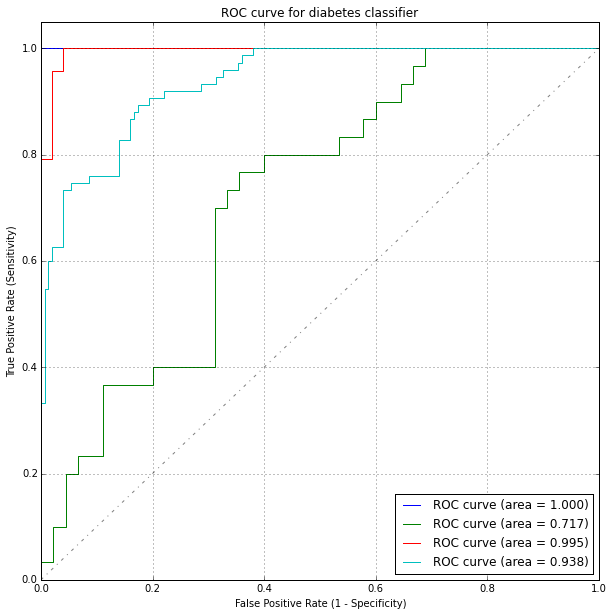

In [24]:
from sklearn.metrics import roc_curve, auc

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
thresholds = dict()
roc_auc = dict()
roc_auc_scores = dict()
for i in range(n_classes):
    fpr[i], tpr[i], thresholds[i] = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], thresholds["micro"] = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

print "roc_auc:"
for key, val in roc_auc.iteritems():
    try:
        print "for {} is {}".format(data_iris.target_names[key], val)
    except:
        print "for micro is {}".format(val)
        
# Plot of a ROC curve for a specific class
plt.figure()
plt.plot(fpr[0], tpr[0], label='ROC curve (area = %0.3f)' % roc_auc[0])
plt.plot(fpr[1], tpr[1], label='ROC curve (area = %0.3f)' % roc_auc[1])
plt.plot(fpr[2], tpr[2], label='ROC curve (area = %0.3f)' % roc_auc[2])
plt.plot(fpr["micro"], tpr["micro"], label='ROC curve (area = %0.3f)' % roc_auc["micro"])
plt.plot([0, 1], [0, 1], 'gray', ls='-.')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.title('ROC curve for diabetes classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

**Confusion matrix advantages:**
* Allows you to calculate a variety of metrics.
* Useful for multi-class problems (more than two response classes).

**ROC/AUC advantages:**
* Does not require you to set a classification threshold.
* Still useful when there is high class imbalance.

Compare different linear SVM classifiers with different [kernels](http://scikit-learn.org/stable/modules/svm.html#svm-kernels) on a 2D projection of the iris dataset. 

Note, linear models have linear decision boundaries (intersecting hyperplanes) while the non-linear kernel models (polynomial or Gaussian RBF) have more flexible non-linear decision boundaries with shapes that depend on the kind of kernel and its parameters.

Sepal width vs heigth


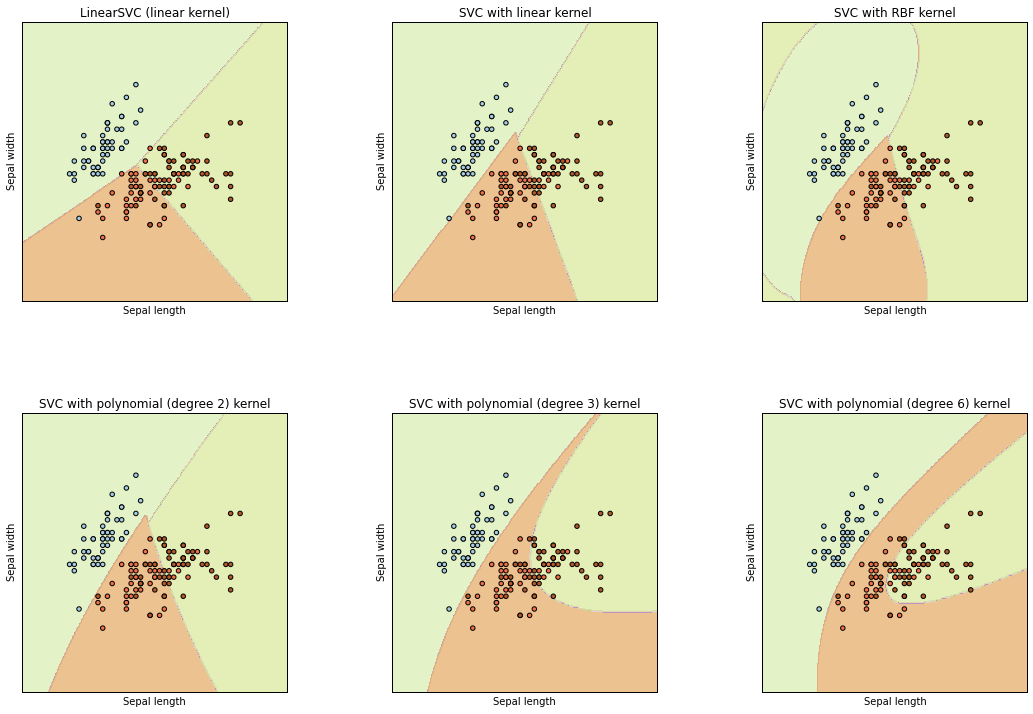



Petal width/heigth


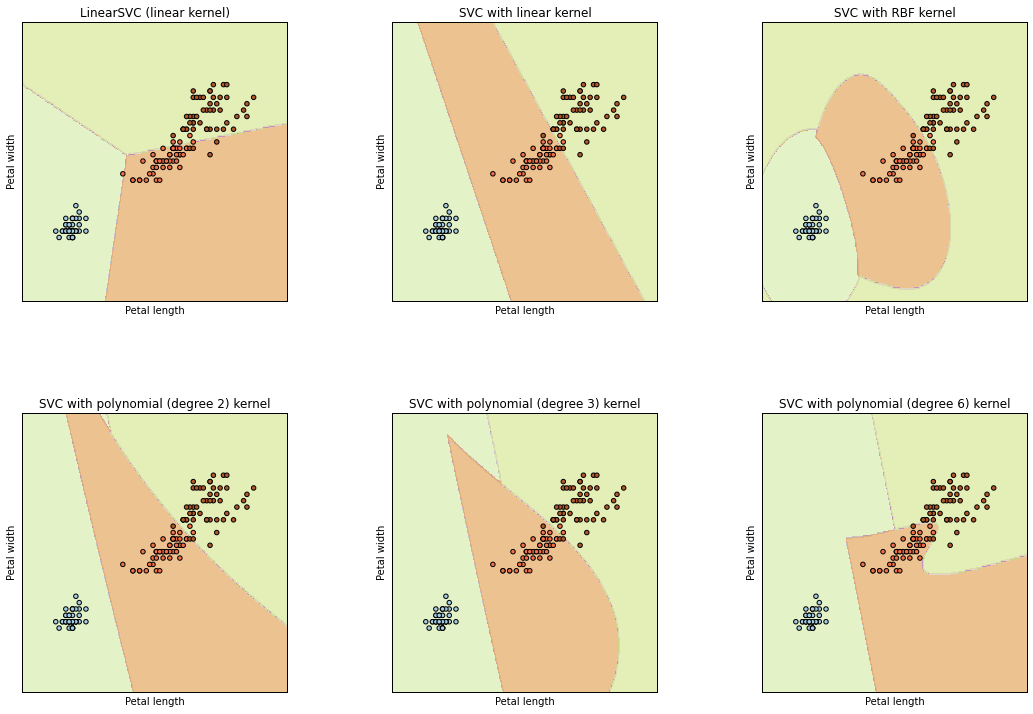

In [25]:
# title for the plots
titles = [
    'LinearSVC (linear kernel)',
    'SVC with linear kernel',
    'SVC with RBF kernel',
    'SVC with polynomial (degree 2) kernel',
    'SVC with polynomial (degree 3) kernel',
    'SVC with polynomial (degree 6) kernel'
]

plt.rcParams["figure.figsize"] = (18.0, 12.0)

def classifiers_comparison(X, y, name):
    # Create an instance of SVM and fit out data. 
    lin_svc = svm.LinearSVC().fit(X, y)
    svc = svm.SVC(kernel='linear').fit(X, y)
    rbf_svc = svm.SVC(kernel='rbf', gamma=0.7).fit(X, y)
    poly2_svc = svm.SVC(kernel='poly', degree=2).fit(X, y)
    poly3_svc = svm.SVC(kernel='poly', degree=3).fit(X, y)
    poly6_svc = svm.SVC(kernel='poly', degree=6).fit(X, y)

    # create a mesh to plot in
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))

    for i, clf in enumerate((lin_svc, svc, rbf_svc, poly2_svc, poly3_svc, poly6_svc)):
        plt.subplot(2, 3, i + 1)
        plt.subplots_adjust(wspace=0.4, hspace=0.4)

        pred = clf.predict(np.c_[xx.ravel(), yy.ravel()])
        # Put the result into a color plot
        pred = pred.reshape(xx.shape)
        plt.contourf(xx, yy, pred, cmap=plt.cm.Set3, alpha=0.8)

        # Plot also the training points
        plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
        plt.xlabel('{} length'.format(name))
        plt.ylabel('{} width'.format(name))
        plt.xlim(xx.min(), xx.max())
        plt.ylim(yy.min(), yy.max())
        plt.xticks(())
        plt.yticks(())
        plt.title(titles[i])
        
    plt.show()


# At first, we will take the first two features: sepal length and sepal width.
Xs = data_iris.data[:, :2] 
y = data_iris.target

print "Sepal width vs heigth"
classifiers_comparison(Xs, y, "Sepal")

# Then we will take the last two features: petal length and sepal width.
Xp = data_iris.data[:, 2:] 
y = data_iris.target

print "\n\nPetal width/heigth"
classifiers_comparison(Xp, y, "Petal")

---
>### Exercise:
> In addition to multiple regression, scikit-learn supports many other learning algorithms for both regression and classification. In the classification setting, the goal is to assign a categorical label to an input rather than a continuous value (as in regression). When doing classification, you will want to use both a evaluation function and a different learning algorithm. 

> In this task you need to build a model to classify images of handwritten digits, which are provided in scikit-learn datasets.
To load the digits and display 18 of the examplars you may use the following code:

> `from sklearn.datasets import load_digits`<br></br>
> `import numpy as np`<br></br><br></br>
> `digits = load_digits()`<br></br>
> `fig = plt.figure()`<br></br>
> `fig.subplots_adjust(hspace=-0.5, wspace=0.2)`<br></br>
> `for i in range(18):`<br></br>
> <span style="margin-left:4.5em"></span>`subplot = fig.add_subplot(3,6,i+1)`<br></br>
> <span style="margin-left:4.5em"></span>`subplot.imshow(digits.images[i], cmap=plt.cm.binary, interpolation='nearest')`<br></br>
> <span style="margin-left:4.5em"></span>`# label the image with the target value`<br></br>
> <span style="margin-left:4.5em"></span>`subplot.text(0, 7, str(digits.target[i]), size=20)`<br></br>
> `plt.show()`<br></br>

> <img src="images/digits.png">



>### Exercise 2.1
> Investigate all digits datasets keyses. Display how handwritten digits are represented there (this information are stored as features and targets). Write all features and targets to the `X` and `Y` variables, respectively.

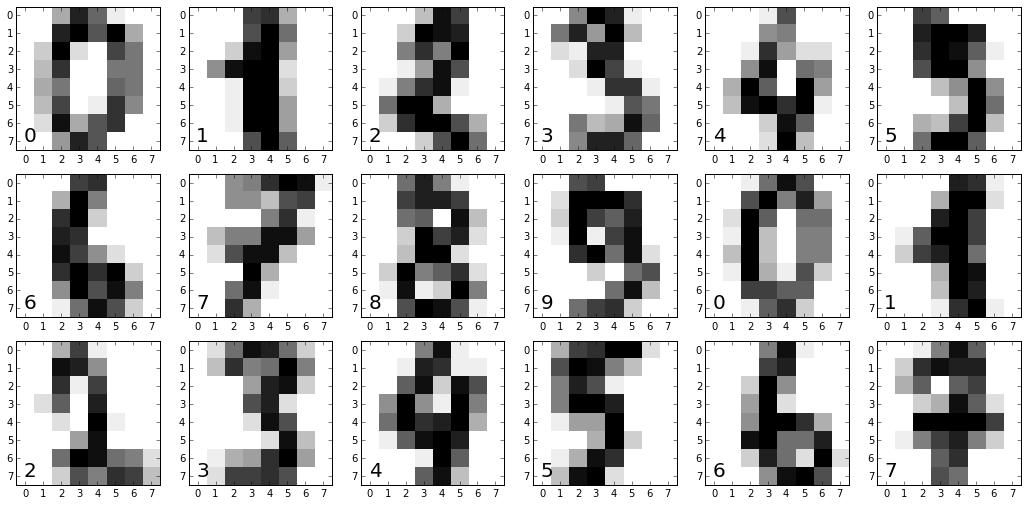

In [26]:
# type your code here

from sklearn.datasets import load_digits
import numpy as np

digits = load_digits()
fig = plt.figure()
fig.subplots_adjust(hspace=-0.5, wspace=0.2)
for i in range(18):
    subplot = fig.add_subplot(3,6,i+1)
    subplot.imshow(digits.images[i], cmap=plt.cm.binary, interpolation='nearest')
    # label the image with the target value
    subplot.text(0, 7, str(digits.target[i]), size=20)
plt.show()

# features
X = digits.data

# targets
Y = digits.target

In [27]:
from test_helper import Test

Test.assertEqualsHashed([X,Y], '5fb7a395738cc8b72af5b35111c1911496209229', 'Incorrect data format',"Exercise 2.1 is successful")

1 test passed. Exercise 2.1 is successful


>### Exercise 2.2:
> Create a new `SVC` classifier. Select one item from digits dataset (one digit) in random way - this is the digit which you need to classify. Fit the classifier with all digits with the exception of the previously select digit (`X` array) and respective targets (`Y` array). Predict the label of the selected digit and draw it as shown on example above. Check whether predicted label and the picture coincide.  Write your training model in `your_model` variable.

In [41]:
# type your code here
svc = svm.SVC(probability=True)

# features
#X = digits.data

# targets
#Y = digits.target

print X[:5]

Y = X[0]
print Y
X = X[1:]
#X = X[1:]
svc.fit(X, Y)
svc.predict(X)
svc.score(X, Y)
your_model = svc

[[ 4.7  3.2  1.3  0.2]
 [ 4.6  3.1  1.5  0.2]
 [ 5.   3.6  1.4  0.2]
 [ 5.4  3.9  1.7  0.4]
 [ 4.6  3.4  1.4  0.3]]
[4.7000000000000002, 3.2000000000000002, 1.3, 0.20000000000000001]
[[ 4.6  3.1  1.5  0.2]
 [ 5.   3.6  1.4  0.2]
 [ 5.4  3.9  1.7  0.4]
 [ 4.6  3.4  1.4  0.3]
 [ 5.   3.4  1.5  0.2]]


ValueError: Unknown label type: [4.7000000000000002, 3.2000000000000002, 1.3, 0.20000000000000001]

In [29]:
Test.assertEqualsHashed(your_model.score(X,Y)+len(your_model.support_), '851fbe8d5bdf36685e3773c7bfbed53ab2e348c4', 
                        'Incorrect model',  "Exercise 2.2 is successful")

1 test failed. Incorrect model


>### Exercise 2.3:
> Use `train_test_split` function do divide whole dataset into train and test parts. Note, test part should contain 30% of items from whole dataset, then the train part will consist from 70% of digits and set `random_state=0` for this function. Build [logistic regression](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html#sklearn.linear_model.LogisticRegression) model anf fit it based on obtained train and test data. Calculate and display the accuracy of training and testing for the model and write accuracy to the `accuracy_train` and `accuracy_test` variables.

In [30]:
# type your code here

from sklearn.linear_model import LogisticRegression


clf = LogisticRegression()

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=.3, random_state=0)

clf.fit(X_train,y_train)
Y_pred = clf.predict(X_test)

accuracy_train = clf.score(X_train,y_train)
accuracy_test = clf.score(X_test,y_test)

In [31]:
Test.assertEqualsHashed(accuracy_train, '8ad4947a8a54b9df82dfb5a2b7234db3fed51578', 'Incorrect train accuracy',
                        "Exercise 2.3.1 is successful")
Test.assertEqualsHashed(accuracy_test, 'f57ec781f77e107cadd52fa76ff28d3e5396fd61', 'Incorrect test accuracy',
                        "Exercise 2.3.2 is successful")

1 test passed. Exercise 2.3.1 is successful
1 test passed. Exercise 2.3.2 is successful


>### Exercise 2.4:

> For the train and test data from the previous task build a linear and a RBF SVC classifiers. Construct to both of them the confusion matrix and calucate the `accuracy_score` value, write result to the `cm_rbf`, `cm_linear`, `accuracy_rbf`, `accuracy_linear` variables. Also draw ROC curves for each class from dataset (each digit) and calculate the AUC value for them,  write auc to the `roc_auc_rbf` and `roc_auc_linear` variables.

In [32]:
# type your code here

lin_svc = svm.SVC(kernel='linear')
rbf_svc = svm.SVC(kernel='rbf')
lin_svc.fit(X_train, y_train)
rbf_svc.fit(X_train, y_train)

y_pred_lin_svc = lin_svc.predict(X_test)
y_pred_rbf_svc = rbf_svc.predict(X_test)
# Compute confusion matrix
#cm = confusion_matrix(y_test, y_pred)

# confusion matrix for rbf model
cm_rbf = confusion_matrix(y_test, y_pred_rbf_svc)

# confusion matrix for linear model
cm_linear = confusion_matrix(y_test, y_pred_lin_svc)

In [33]:
# type your code here

# accuracy for rbf model
accuracy_rbf = accuracy_score(y_test, y_pred_rbf_svc)

# accuracy for linear model
accuracy_linear = accuracy_score(y_test, y_pred_lin_svc)


In [34]:
del lin_svc
del rbf_svc

In [35]:
# type your code here
from sklearn.metrics import roc_auc_score

lin_svc = OneVsRestClassifier(svm.SVC(kernel='linear', probability=True))
rbf_svc = OneVsRestClassifier(svm.SVC(kernel='rbf', probability=True))

X = data_iris.data
Y = data_iris.target
y_bin = label_binarize(Y, classes=[0, 1, 2])
clf = LogisticRegression()

X_train, X_test, y_train, y_test = train_test_split(X, y_bin, test_size=.3, random_state=0)

#y_pred_lin_svc = lin_svc.predict(X_test)
#y_pred_rbf_svc = rbf_svc.predict(X_test)

y_score_lin_svc = lin_svc.fit(X_train, y_train).decision_function(X_test)
y_score_rbf_svc = rbf_svc.fit(X_train, y_train).decision_function(X_test)

#fpr[i], tpr[i], thresholds[i] = roc_curve(y_test[:, i], y_score[:, i])
#roc_auc[i] = auc(fpr[i], tpr[i])

# auc for rbf model
roc_auc_rbf = roc_auc_score(y_test, y_score_rbf_svc)

# auc for linear model
roc_auc_linear = roc_auc_score(y_test, y_score_lin_svc)


In [36]:
Test.assertEqualsHashed(cm_rbf, 'a79e978b913c428a7cbb23bd8b094d2d4b2953b6', 'Incorrect confusion matrix for rbf model',
                        "Exercise 2.4.1 is successful")
Test.assertEqualsHashed(cm_linear, 'bb5130d994c6fadd30fdce8c56a2a702a72d92bf', 'Incorrect confusion matrix for linear model',
                        "Exercise 2.4.2 is successful")
Test.assertEqualsHashed(accuracy_rbf, '4f6674ac2acdb0cf7cf008f8edebd51653e76796', 'Incorrectfor accuracy rbf model',
                        "Exercise 2.4.3 is successful")
Test.assertEqualsHashed(accuracy_linear, '7be00362c938bfaf4366910b33cbbe85fa26b01d', 'Incorrect accuracy for linear model',
                        "Exercise 2.4.4 is successful")
Test.assertEqualsHashed(roc_auc_rbf, '0bf8e844eb3dcac498daffde677a2345f5da6544', 'Incorrect auc for rbf model',
                        "Exercise 2.4.5 is successful")
Test.assertEqualsHashed(roc_auc_linear, '0f6d2b3394075cd035329f53abfffb877a934533', 'Incorrect auc for linear model',
                        "Exercise 2.4.6 is successful")

1 test passed. Exercise 2.4.1 is successful
1 test passed. Exercise 2.4.2 is successful
1 test passed. Exercise 2.4.3 is successful
1 test passed. Exercise 2.4.4 is successful
1 test failed. Incorrect auc for rbf model
1 test failed. Incorrect auc for linear model


<center><h3>Presented by <a target="_blank" rel="noopener noreferrer nofollow" href="http://datascience-school.com">datascience-school.com</a></h3></center>